<a href="https://colab.research.google.com/github/Ngoson2004/Deep-Learning-for-Vietnamese/blob/main/Logistic_Regression_for_VietnamBankCustomer_dataset_Week4_Advanced_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hồi quy Logistics (Logistic Regression)

## Tuần 4: Các kĩ năng nâng cao

Chúc mừng bạn đã đi đến tuần cuối cùng của khóa học.

## 1. Tải lại


Trước tiên, ta phải nhập về các thư viện cần thiết

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

Giờ ta sẽ tải lại dữ liệu đã được xử lí ở tuần trước.

In [2]:
X = pd.read_csv('/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/X_data.csv')
y = pd.read_csv('/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/y_data.csv')
df = X.join(y)
df.head()
# print(df.head())

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,marital_0,marital_1,marital_2,term_deposit
0,58,4,2,0,2143,1,0,261,1,0,0,0.0,0.0,1.0,0
1,44,9,1,0,29,1,0,151,1,0,0,0.0,1.0,0.0,0
2,33,2,1,0,2,1,1,76,1,0,0,0.0,0.0,1.0,0
3,47,1,3,0,1506,1,0,92,1,0,0,0.0,0.0,1.0,0
4,33,11,3,0,1,0,0,198,1,0,0,0.0,1.0,0.0,0


In [3]:
df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'marital_0', 'marital_1',
       'marital_2', 'term_deposit'],
      dtype='object')

In [4]:
np.shape(df)

(42639, 15)

## 2. Multi-collinearity

Để dữ liệu của chúng ta sạch hơn, ta cần kiểm tra **multi-collinearity** (đa cộng tuyến) giữa các đại lượng trong dữ liệu. Multi-collinearity là một hiện tượng trong phân tích hồi quy khi mà hai hoặc nhiều biến độc lập trong mô hình có tương quan mạnh mẽ với nhau. 2 đại lượng A và B có tương quan với nhau khi A thay đổi thì B cũng thay đổi.

Khi xử lí dữ liệu cho logistic regression, ta cần phải xem đại lượng nào có ảnh hưởng đến kết quả dự đoán nhiều nhất. Đối với bài toán dự đoán dữ liệu ngân hàng của chúng ta, ta cần phải xem giá trị nào có tương quan nhiều nhất với ground-truth label (term_deposit).

Đề làm được điều đó, hãy nhìn vào tấm biểu đồ này.

<Axes: title={'center': 'Biểu đồ hệ số tương quan giữa các cột giá trị'}>

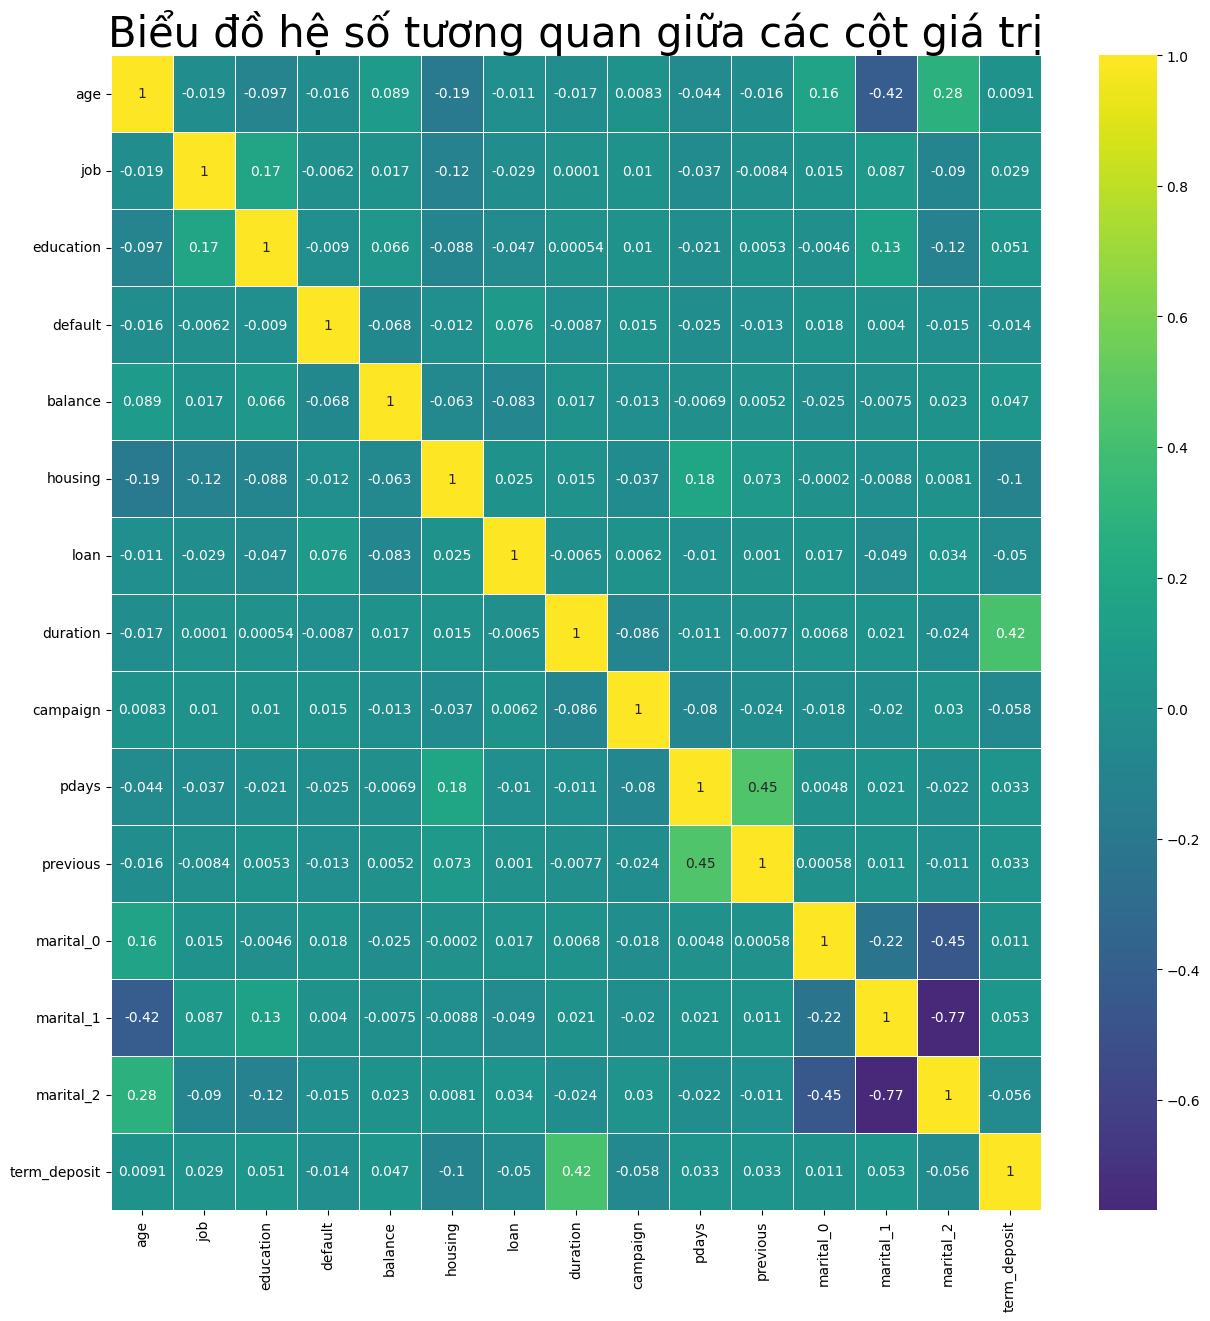

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.title("Biểu đồ hệ số tương quan giữa các cột giá trị", fontsize=30)
sns.heatmap(df.corr(), center=0, linewidths=0.5, cmap="viridis", annot=True)

Mỗi một ô vuông chứa một con số. Con số này là **correlation coefficient** (hệ số tương quan). Giá trị tuyệt đối của số càng lớn (càng gần 1), 2 đại lượng đó càng tương quan với nhau. nếu hệ số tương quan dương thì 2 giá trị đó tỉ lệ thuận, còn âm thì ngược lại.

Hãy nhìn vào phần term_deposit của biểu đồ, ta sẽ loại đi những đại lượng có correlation coefficient thấp. Ta thấy "age" có hệ số rất thấp (dưới 0.01), nên ta sẽ bỏ cột này đi.

In [6]:
df_final = df.drop(['age'], axis=1)
print("(Số hàng, số cột):", np.shape(df_final))

(Số hàng, số cột): (42639, 14)


In [7]:
X_data = df_final.drop(['term_deposit'], axis=1)
y_data = df_final['term_deposit']

In [8]:
X_data, y_data = X_data.to_numpy(), y_data.to_numpy()

In [9]:
print("Hình dạng tập đầu vào X; ", np.shape(X_data))

Hình dạng tập đầu vào X;  (42639, 13)


In [10]:
y_data = y_data.reshape((42639,1))

In [11]:
y_data

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## 3. Normalisation - tiêu chuẩn hóa dữ liệu

Mỗi cột dữ liệu của chúng ta có biên độ dữ liệu khác nhau (khoảng cách giữa giá trị lớn nhất và nhỏ nhất). Điều này có thể làm khó việc dự đoán của thuật toán. Vậy nên, việc scale lại dữ liệu sao cho đồng đều là cần thiết.

Để scale lại data, ta dựa vào công thức:

\begin{equation} z = \frac{x - \mu}{\sigma} \end{equation}

Ở đây, x là từng giá trị ở trong tập data, μ là trung bình cộng của các giá trị trong một cột, còn σ là độ lệch chuẩn của các giá trị trong cột đó.

Bạn hãy hoàn thành hàm dưới đây để scale lại data nhé. Hint: dùng np.mean và np.std

In [12]:
def scaler(data):
  ### BEGIN SOLUTION
  #Gợi ý: dùng np.mean() và np.std()
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)
  data = (data - mean) / std
  ### END SOLUTION
  return data

X_data = scaler(X_data)


In [13]:
### IS REQUIRED FOR GRADING

# Test 10 points: Simple array with no outliers
data = np.array([1, 2, 3, 4, 5])
expected_output = np.array([-1.41421356, -0.70710678, 0., 0.70710678, 1.41421356])
np.testing.assert_allclose(scaler(data), expected_output, rtol=1e-05, atol=1e-08)

# Test 10 points: Array with outliers
data = np.array([1, 2, 3, 4, 5, 100])
expected_output = np.array([-0.50221883, -0.47457376, -0.44692869, -0.41928361, -0.39163854, 2.23464343])
np.testing.assert_allclose(scaler(data), expected_output, rtol=1e-05, atol=1e-08)

# Test 10 points: Empty array
data = np.array([])
expected_output = np.array([])
np.testing.assert_allclose(scaler(data), expected_output, rtol=1e-05, atol=1e-08)

print("All test cases passed!")



All test cases passed!


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Giờ ta sẽ tách data ra làm 2 tập như ở tuần trước đã nói.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
print("Kích thước tập X dùng cho training: ",np.shape(X_train))
print("Kích thước tập Y dùng cho training: ",np.shape(y_train))
print("Kích thước tập X dùng cho validation: ",np.shape(X_val))
print("Kích thước tập Y dùng để cho validation: ",np.shape(y_val))

Kích thước tập X dùng cho training:  (34111, 13)
Kích thước tập Y dùng cho training:  (34111, 1)
Kích thước tập X dùng cho validation:  (8528, 13)
Kích thước tập Y dùng để cho validation:  (8528, 1)


## 4. He initialisation

Có một phương pháp thường được ứng dụng trong khởi tạo trọng số. Phương pháp này đặc biệt hữu ích cho các mạng sử dụng hàm kích hoạt ReLU (Rectified Linear Unit).

Mục tiêu của phương pháp này là giúp trọng số được khởi tạo sao cho không bị quá gần 0, tránh hiện tượng đạo hàm của trọng số (gradient) trở nên quá nhỏ (vanishing gradient) trong quá trình training các mạng có nhiều lớp.

Để thực hiện phương pháp này, ta nhân các trọng số và bias với $\sqrt{\frac{2}{n}}$, trong đó n là số neuron của lớp trước, hay nói cách khác là số hàng của trọng số/bias lớp hiện tại.

Bạn hãy làm như phương pháp đã được nói ở tuần trước, và thêm $\sqrt{\frac{2}{n}}$.

In [15]:
def initParam():
  ### BEGIN SOLUTION
  #Gợi ý: dùng numpy.sqrt()
  W1 = np.random.randn(13, 128) * np.sqrt(2./13)
  b1 = np.random.randn(1, 128) * np.sqrt(2./1)
  W2 = np.random.randn(128, 1) * np.sqrt(2./128)
  b2 = np.random.randn(1, 1) * np.sqrt(2./1)
  return W1, b1, W2, b2
  ### END SOLUTION

In [16]:
### IS REQUIRED FOR GRADING

# Test 40 points: Check types
W1, b1, W2, b2 = initParam()
assert isinstance(W1, np.ndarray), "W1 phải là vector dạng numpy"
assert isinstance(b1, np.ndarray), "b1 phải là vector dạng numpy"
assert isinstance(W2, np.ndarray), "W2 phải là vector dạng numpy"
assert isinstance(b2, np.ndarray), "b2 phải là vector dạng numpy"

# Test 40 points: Check shapes
### BEGIN HIDDEN TEST
assert W1.shape == (13, 128), f"Vector W1 phải có các chiều là (13, 128), không phải {W1.shape}"
assert b1.shape == (1, 128), f"Vector b1 phải có các chiều là (1, 128), không phải {b1.shape}"
assert W2.shape == (128, 1), f"Vector W2 phải có các chiều là (128, 1), không phải {W2.shape}"
assert b2.shape == (1, 1), f"Vector b2 phải có các chiều là (1, 1), không phải {b2.shape}"
### END HIDDEN TEST

# Test 20 points: Check mean
assert np.allclose(W1.mean(), 0, atol=1e-1), f"W1 không có giá trị trung bình gần bằng 0 (mean={W1.mean()})"
assert np.allclose(W2.mean(), 0, atol=1e-1), f"W2 không có giá trị trung bình gần bằng 0 (mean={W2.mean()})"

# Test 20 points: Check mean
assert np.allclose(W1.std(), np.sqrt(2 / 13), atol=1e-1), f"W1 không tuân theo He initialization (std = {W1.std()})"
assert np.allclose(W2.std(), np.sqrt(2 / 128), atol=1e-1), f"W2 không tuân theo He initialization (std = {W2.std()})"

print("Chúc mừng bạn đã làm đúng!")

Chúc mừng bạn đã làm đúng!


## 5. Gradient clipping

Gradient clipping là một phương pháp trong training nhằm tránh việc gradient trở nên quá lớn (exploding gradient). Khi đó, các trọng số sẽ khoảng cập nhật quá lớn, khiến cho quá trình training trở nên mất ổn định và loss khó đạt đến cực tiểu.

Để thực hiện gradient clipping, ta phải đặt ra một ngưỡng mà độ chuẩn L2 (L2 norm) của gradient không được phép vượt qua. L2 norm của một vector $\vec{w}$ được tính như sau:

\begin{equation}\vec{w} = \begin{bmatrix} x \\ y\end{bmatrix} = x^2 + y^2 \end{equation}

Khi L2 norm của gradient $\Delta W$ vượt quá ngưỡng quy định k, $\Delta W$ sẽ được cập nhật như sau:
\begin{equation} \Delta W = ΔW * \frac{k}{\|W\|_2}\end{equation}
Trong đó, $\|W\|_2$ là L2 norm của W.

Gradient clipping thường được thực hiện trong quá trình Back Propagation.

Bạn hãy hoàn thành hàm gradient clipping dưới đây dựa vào những kiến thức trên nhé.

In [17]:
# Gợi ý 1: để tính L2 norm, dùng np.linalg.norm.
# Gợi ý 2: grads ở đây là một tập gồm một hoặc nhiều vector
# Gợi ý 3: thêm điều kiện so sánh L2 norm với ngưỡng

def gradient_clipping(grads, k):
  ### BEGIN SOLUTION
  norm = np.sqrt(np.sum([np.linalg.norm(grad)**2 for grad in grads]))  # tạo vòng lặp tính L2 norm của các phần tử tập grads
  if norm > k:   # thêm điều kiện so sánh L2 norm
    for i in range(len(grads)):
      grads[i] = grads[i] * k / norm
  ### END SOLUTION
  return grads


In [18]:
### IS REQUIRED FOR GRADING

# Test 20 points: No clipping needed
grads = [np.array([1, 2, 3]), np.array([4, 5, 6])]
max_norm = 10
clipped_grads = gradient_clipping(grads, max_norm)
assert np.allclose(clipped_grads[0], np.array([1, 2, 3])), f"{np.sqrt(np.sum([np.linalg.norm(grad)**2 for grad in grads]))} < 10 nên gradient phải giữ nguyên, nhận được {clipped_grads[0]}"
assert np.allclose(clipped_grads[1], np.array([4, 5, 6])), f"{np.sqrt(np.sum([np.linalg.norm(grad)**2 for grad in grads]))} < 10 nên gradient phải giữ nguyên, nhận được {clipped_grads[1]}"

### BEGIN HIDDEN TEST
# Test 20 points: Clipping needed
grads = [np.array([1, 2, 3]), np.array([4, 5, 6])]
max_norm = 5
clipped_grads = gradient_clipping(grads, max_norm)
assert np.allclose(clipped_grads[0], np.array([1, 2, 3]) * 5 / np.sqrt(91), atol=1e-2)
assert np.allclose(clipped_grads[1], np.array([4, 5, 6]) * 5 / np.sqrt(91), atol=1e-2)
### END HIDDEN TEST

# Test 10 points: Empty grads
grads = []
max_norm = 5
clipped_grads = gradient_clipping(grads, max_norm)
assert clipped_grads == []

# Test 10 points: Single grad
grads = [np.array([1, 2, 3])]
max_norm = 5
clipped_grads = gradient_clipping(grads, max_norm)
assert np.allclose(clipped_grads[0], np.array([1, 2, 3]))

print("Chúc mừng bạn đã làm đúng!")


All test cases passed!


## 6. Dropout

Dropout là một phương pháp tối ưu hóa khác, giúp model tránh khỏi tình trạng quá khớp (overfit). Một model được gọi là overfit khi nó có thể dự đoán rất tốt trên tập dữ liệu đã được huấn luyện (train set), nhưng lại dự đoán kém trên tập data mới mà model chưa được train bao giờ (test set). Nguyên nhân của overfit chủ yếu đến từ việc model học quá kỹ các chi tiết trong dữ liệu huấn luyện, kể cả các dữ liệu nhiễu.

Khi mô hình quá khớp, nó trở nên quá phức tạp, học thuộc cả các mẫu nhiễu và những đặc điểm không quan trọng trong dữ liệu, thay vì nắm bắt các mối quan hệ tổng quát giữa các biến số. Điều này làm giảm khả năng tổng quát hóa của mô hình đối với dữ liệu thực tế.

Trong Học máy và Học sâu, một model được đánh giá cao là khi nó có thể hoạt động được tốt trên cả dữ liệu đã được học và dữ liệu chưa được học. Để tránh tình trạng overfit, chúng ta có những phương pháp để giúp model bớt cồng kềnh hơn. Một trong những phương pháp đó là dropout. Dropout là một phương pháp cắt bỏ một số phần tử neuron trong 1 lớp một cách ngẫu nhiên, giúp cho cấu trúc model đơn giản hơn.

Dropout được thực hiện khá đơn giản. Đầu tiên, ta sẽ đưa ra một tỉ lệ được gọi là *keep_prob*. Đây là xác suất để một neuron được giữ lại trong model. *keep_prob* càng thấp thì càng nhiều neuron có khả năng bị tỉa bỏ. Tiếp theo ta có các bước sau đây:

1. Tạo ra một vector sàng lọc, hay còn gọi là mask. Đối với một lớp nhất định, mask phải có hình dạng giống với trọng số đại diện lớp đó. Mask có thể được tạo ngẫu nhiên với các phần tử trong khoảng từ 0 đến 1, dùng hàm **random.rand()** của Numpy.
2. Chuyển đổi các phần tử của mask sang dạng binary, 1 khi phần tử nhỏ hơn keep_prob và 0 khi phần tử lớn hơn keep_prob. *Gợi ý: trong numpy, khi đặt X = (X<0.5), X sẽ thành một mảng mới với các giá trị 0 (nếu phần tử cũ của X > 0.5) hoặc 1 (nếu phẩn tử cũ của X < 0.5)*
3. Nhân mask với trọng số w để loại bỏ một số neuron trong w. Nếu một neuron trong w ứng với một phần tử 0 trong mask, neuron đó sẽ bị loại bỏ sau phép nhân.
4. Lấy tích vừa tính chia cho *keep_prob*. Lí do cho việc này là chúng ta muốn đảm bảo loss tính được sau đó không bị ảnh hưởng bởi việc chúng ta loại bỏ vài neuron.

Dựa vào các bước trên, hãy hoàn thành hàm sau đây.

In [19]:
def dropout(w, keep_prob):
  ### BEGIN SOLUTION
  mask = np.random.rand(w.shape[0], w.shape[1]) < keep_prob
  out = w * mask / keep_prob
  ### END SOLUTION
  return out


In [20]:
### IS REQUIRED FOR GRADING

# Test 10 points: No dropout
x = np.array([[1, 2, 3], [4, 5, 6]])
keep_prob = 1.0
out = dropout(x, keep_prob)
assert np.allclose(out, x), "Khi keep_prob=1, đầu ra phải giống với đầu vào."

### BEGIN HIDDEN TEST
# Test 20 points: Dropout with keep_prob 0.5
x = np.array([[1, 2, 3], [4, 5, 6]])
keep_prob = 0.5
out = dropout(x, keep_prob)
assert out.shape == x.shape, "Hình dạng đầu ra phải giống với hình dạng đầu vào"
assert np.all(np.isin(out, [0, 2, 4, 6, 8, 10, 12])), "Các giá trị đầu ra phải là 0 hoặc gấp đôi các giá trị đầu vào"
### END HIDDEN TEST

# Test 20 points: Dropout with keep_prob 0.2
x = np.array([[1, 2, 3], [4, 5, 6]])
keep_prob = 0.2
out = dropout(x, keep_prob)
assert out.shape == x.shape, "Hình dạng đầu ra phải giống với hình dạng đầu vào"
assert np.all(np.isin(out, [0, 5, 10, 15, 20, 25, 30])), "Các giá trị đầu ra phải là 0 hoặc 5 lần các giá trị đầu vào"


print("Chúc mừng bạn đã làm đúng!")


All test cases passed!


## 7. Regularisation

Cuối cùng, ta có một phương pháp tránh overfit khác gọi là L2 regularisation. Điểm mấu chốt của phương pháp này là thêm một đại lượng vào hàm mất mát, từ đó giúp cho các trọng số giảm nhiều hơn, hạn chế độ lớn của chúng. Để sử dụng L2 regularisation, ta áp dụng công thức sau khi tính loss:

\begin{equation} Loss = Loss_{original} + \frac{λ}{2m}w_j^2\end{equation}

Trong đó:
- Loss original: hàm mất mát ban đầu (thường là Mean Squared Error đối với hồi quy tuyến tính).
- λ: hệ số điều chỉnh cho mức độ regularization ($\lambda$ càng lớn thì l2 regularisation càng mạnh).
- $w_j$: các trọng số của mô hình.

Dựa vào công thức trên, bạn hãy hoàn thành bài bên dưới.

In [31]:
# Gợi ý: dùng np.sum và np.square

def l2_regularization(weights, lambd):
  ### BEGIN SOLUTION
  loss = 0
  for weight in weights:
    loss += np.sum(np.square(weight))
  return (lambd / 2) * loss
  ### END SOLUTION

In [27]:
### IS REQUIRED FOR GRADING

import numpy as np

def l2_regularization(weights, lambd):
  """
  Computes L2 regularization loss.

  Args:
    weights: A list of weight matrices.
    lambd: The regularization strength.

  Returns:
    The L2 regularization loss.
  """
  loss = 0
  for weight in weights:
    loss += np.sum(np.square(weight))
  return (lambd / 2) * loss

# Test cases
# Test 10 points: Empty weights list
weights = []
lambd = 0.1
assert l2_regularization(weights, lambd) == 0

# Test 10 points: Single weight matrix
weights = [np.array([[1, 2], [3, 4]])]
lambd = 0.1
assert l2_regularization(weights, lambd) == 0.5 * 0.1 * (1 + 4 + 9 + 16)

# Test 10 points: Multiple weight matrices
weights = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
lambd = 0.1
expected_loss = 0.5 * 0.1 * (1 + 4 + 9 + 16 + 25 + 36 + 49 + 64)
assert l2_regularization(weights, lambd) == expected_loss

# Test 10 points: Zero weights
weights = [np.array([[0, 0], [0, 0]])]
lambd = 1
assert l2_regularization(weights, lambd) == 0

# Test 10 points: Different lambda value
weights = [np.array([[1, 2], [3, 4]])]
lambd = 0.5
assert l2_regularization(weights, lambd) == 0.5 * 0.5 * (1 + 4 + 9 + 16)

print("Chúc mừng bạn đã làm đúng!")

Chúc mừng bạn đã làm đúng!


## 8. Stochastic Gradient Descent

In [28]:


def SGD(X_train, y_train, W1, b1, W2, b2, learning_rate, epochs, batch_size = 1, keep_prob = 0.8, lambd=0):
  """
  Performs stochastic gradient descent to train a neural network.

  Args:
      X_train: Training data input.
      y_train: Training data labels.
      W1: Weights of the first layer.
      b1: Biases of the first layer.
      W2: Weights of the second layer.
      b2: Biases of the second layer.
      learning_rate: Learning rate for gradient descent.
      epochs: Number of training epochs.
      batch_size: Size of the mini-batches.

  Returns:
      W1, b1, W2, b2: Updated weights and biases.
      train_loss: list of train loss during training.
      train_acc: list of train accuracy during training.
  """

  train_loss = []
  train_acc = []

  for epoch in tqdm_notebook(range(epochs), desc="Progress"):
    # Mini-batch gradient descent
    for i in range(0, X_train.shape[0], batch_size):
      X_batch = X_train[i:i + batch_size]
      y_batch = y_train[i:i + batch_size]

      # Forward propagation
      Z1 = X_batch.dot(W1) + b1
      A1 = np.tanh(Z1)
      if keep_prob < 1:
        A1 = dropout(A1, keep_prob)
      Z2 = A1.dot(W2) + b2
      y_hat = 1 / (1 + np.exp(-Z2))

      # Calculate loss
      loss = -np.mean(y_batch * np.log(y_hat) + (1 - y_batch) * np.log(1 - y_hat))
      loss += l2_regularization([W1, W2], lambd)
      print("Loss", loss)
      train_loss.append(loss)

      # Calculate accuracy
      y_pred = (y_hat > 0.5).astype(int)
      accuracy = np.mean(y_pred == y_batch)
      print("Accuracy: ", accuracy)
      train_acc.append(accuracy)

      # Backpropagation
      dZ2 = y_hat - y_batch
      dW2 = A1.T.dot(dZ2) / batch_size + lambd*W2
      db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size
      dZ1 = dZ2.dot(W2.T) * (1 - np.tanh(Z1)**2)
      dW1 = X_batch.T.dot(dZ1) / batch_size + lambd*W1
      db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

      # Gradient clipping
      dW1, dW2 = gradient_clipping([dW1, dW2], 10)
      db1, db2 = gradient_clipping([db1, db2], 10)

      # Update weights and biases
      W2 -= learning_rate * dW2
      b2 -= learning_rate * db2
      W1 -= learning_rate * dW1
      b1 -= learning_rate * db1

  return W1, b1, W2, b2, train_loss, train_acc


In [30]:
W1,b1, W2, b2 = initParam()
W1, b1, W2, b2, train_loss, train_acc = SGD(X_train, y_train, W1, b1, W2, b2, learning_rate=0.01, epochs=50)
print("Loss cuối cùng: ", train_loss[-1])
print("Độ chính xác cuối cùng: ", train_acc[-1])

Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Loss 0.04680481179736774
Accuracy:  1.0
Loss 0.045664408000283006
Accuracy:  1.0
Loss 0.570127602517219
Accuracy:  1.0
Loss 0.007092097840147421
Accuracy:  1.0
Loss 0.007554998041918472
Accuracy:  1.0
Loss 0.02207413762442464
Accuracy:  1.0
Loss 0.11637868019329552
Accuracy:  1.0
Loss 0.6994506876571547
Accuracy:  0.0
Loss 0.01120996306066974
Accuracy:  1.0
Loss 0.03211657871106721
Accuracy:  1.0
Loss 0.008368590757502863
Accuracy:  1.0
Loss 0.010617768711804317
Accuracy:  1.0
Loss 0.012486783386148408
Accuracy:  1.0
Loss 0.00662219904626056
Accuracy:  1.0
Loss 4.91969454210595
Accuracy:  0.0
Loss 0.02840535114187033
Accuracy:  1.0
Loss 0.010047144997387234
Accuracy:  1.0
Loss 0.012580424709237668
Accuracy:  1.0
Loss 0.0373094662978582
Accuracy:  1.0
Loss 0.12677858281903462
Accuracy:  1.0
Loss 0.04545600992881596
Accuracy:  1.0
Loss 0.02120367865254966
Accuracy:  1.0
Loss 0.24080274059211706
Accuracy:  1.0
Loss 0.0021693873277588904
A

## 9. Lời kết

Chúc mừng bạn đã hoàn thành xong 4 tuần của khóa học cơ bản về Deep Learning và Logistic Regression!

Chúng tôi hi vọng khóa học này đã giúp bạn nắm vững những khái niệm cơ bản nhất của Học Sâu và Hồi quy Logistics. Hãy đón chờ những khóa học sắp tới của chúng tôi!